In [1]:
import pycbc.noise
from pycbc.noise import noise_from_psd
import pycbc.psd
import pylab as plt
import pycbc.filter as pfliter
from pycbc.waveform import get_td_waveform
import random
import numpy as np
import cProfile

/home/arush/anaconda3/envs/python39_1/lib/python3.9/site-packages/pycbc/types/array.py:36: UserWarning: Wswiglal-redir-stdio:

SWIGLAL standard output/error redirection is enabled in IPython.
This may lead to performance penalties. To disable locally, use:

with lal.no_swig_redirect_standard_output_error():
    ...

To disable globally, use:

lal.swig_redirect_standard_output_error(True)

Note however that this will likely lead to error messages from
LAL functions being either misdirected or lost when called from
Jupyter notebooks.

To suppress this warning, use:

import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal

  import lal as _lal
PyCBC.libutils: pkg-config call failed, setting NO_PKGCONFIG=1


In [2]:
T = 4
flow = 30.0
delta_f = 1.0 / T
flen = int(2048 / delta_f) + 1
delta_t = 1.0 / 4096
tsamples = int(T / delta_t)

In [3]:
# PSD
psd = pycbc.psd.aLIGOZeroDetHighPower(flen, delta_f, flow)
noisesamples = int(4 / delta_t)
random_scale = 1800

25 26
wvfrm = 
l =  0  SNR =  17.588298845040693  m1 =  25  m2 =  26
21 30
wvfrm = 
l =  0  SNR =  16.00058327237256  m1 =  21  m2 =  30
21 15
wvfrm = 
l =  0  SNR =  12.462054603417089  m1 =  21  m2 =  15
13 18
wvfrm = 
l =  0  SNR =  10.961918977760552  m1 =  13  m2 =  18
23 21
wvfrm = 
l =  1  SNR =  16.565415068420712  m1 =  23  m2 =  21
23 15
wvfrm = 
l =  1  SNR =  15.29333738365521  m1 =  23  m2 =  15
28 19
wvfrm = 
l =  1  SNR =  16.184649749260704  m1 =  28  m2 =  19
30 25
wvfrm = 
l =  1  SNR =  17.98766454911787  m1 =  30  m2 =  25
12 29
wvfrm = 
l =  1  SNR =  14.281772112061489  m1 =  12  m2 =  29
22 27
wvfrm = 
l =  1  SNR =  14.913295586216012  m1 =  22  m2 =  27
29 18
wvfrm = 
l =  1  SNR =  15.645786492738717  m1 =  29  m2 =  18
28 22
wvfrm = 
l =  1  SNR =  15.983286518661744  m1 =  28  m2 =  22
25 11
wvfrm = 
l =  1  SNR =  11.124076151022631  m1 =  25  m2 =  11
26 12
wvfrm = 
l =  1  SNR =  12.270917541877736  m1 =  26  m2 =  12
10 17
wvfrm = 
l =  1  SNR =  9.28806

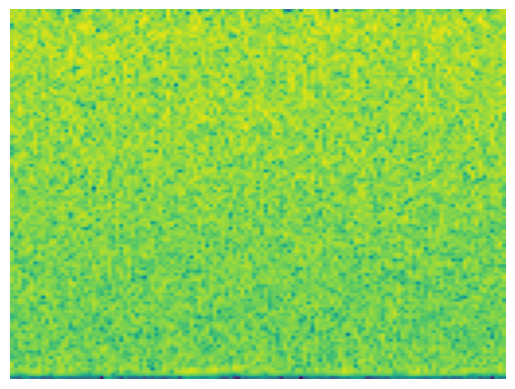

In [4]:
l = 0
while l < 100:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    # rolling:

    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=l + 6000)

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if (5 < snr_peak < 8) or (8 < snr_peak < 11):
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

12 26
wvfrm = 
l =  100  SNR =  11.845272188262173  m1 =  12  m2 =  26
29 10
wvfrm = 
l =  100  SNR =  13.18350130371624  m1 =  29  m2 =  10
10 10
wvfrm = 
l =  100  SNR =  7.459574246357302  m1 =  10  m2 =  10
16 22
wvfrm = 
l =  101  SNR =  14.40843569669639  m1 =  16  m2 =  22
10 14
wvfrm = 
l =  101  SNR =  9.188068928613037  m1 =  10  m2 =  14
17 22
wvfrm = 
l =  102  SNR =  14.170736880309125  m1 =  17  m2 =  22
19 10
wvfrm = 
l =  102  SNR =  10.9775581143953  m1 =  19  m2 =  10
23 10
wvfrm = 
l =  103  SNR =  10.4448299192866  m1 =  23  m2 =  10
18 25
wvfrm = 
l =  104  SNR =  14.562178966770466  m1 =  18  m2 =  25
21 14
wvfrm = 
l =  104  SNR =  11.472649921967943  m1 =  21  m2 =  14
12 21
wvfrm = 
l =  104  SNR =  12.28279841041504  m1 =  12  m2 =  21
30 17
wvfrm = 
l =  104  SNR =  15.374718451392448  m1 =  30  m2 =  17
28 19
wvfrm = 
l =  104  SNR =  13.956490310758918  m1 =  28  m2 =  19
24 21
wvfrm = 
l =  104  SNR =  14.306588637396313  m1 =  24  m2 =  21
18 16
wvfrm = 


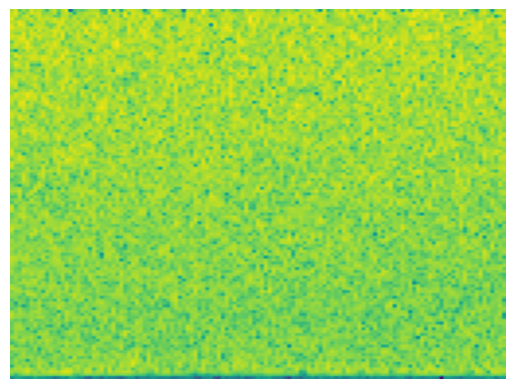

In [5]:
while l < 200:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=l + 6000)

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if (5 < snr_peak < 8) or (8 < snr_peak < 11):
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

30 16
wvfrm = 
l =  200  SNR =  15.159144427705575  m1 =  30  m2 =  16
14 20
wvfrm = 
l =  200  SNR =  12.592020636014107  m1 =  14  m2 =  20
15 18
wvfrm = 
l =  200  SNR =  13.092358520917294  m1 =  15  m2 =  18
11 16
wvfrm = 
l =  200  SNR =  10.672064435452533  m1 =  11  m2 =  16
30 26
wvfrm = 
l =  201  SNR =  17.909737635874876  m1 =  30  m2 =  26
17 10
wvfrm = 
l =  201  SNR =  9.717229565013756  m1 =  17  m2 =  10
18 20
wvfrm = 
l =  202  SNR =  12.345570018644962  m1 =  18  m2 =  20
23 13
wvfrm = 
l =  202  SNR =  13.038035887873322  m1 =  23  m2 =  13
17 30
wvfrm = 
l =  202  SNR =  15.946171584470877  m1 =  17  m2 =  30
13 22
wvfrm = 
l =  202  SNR =  11.915179032916182  m1 =  13  m2 =  22
12 21
wvfrm = 
l =  202  SNR =  11.770674676533586  m1 =  12  m2 =  21
16 15
wvfrm = 
l =  202  SNR =  11.691098886858965  m1 =  16  m2 =  15
29 19
wvfrm = 
l =  202  SNR =  17.9681420207707  m1 =  29  m2 =  19
24 27
wvfrm = 
l =  202  SNR =  17.794580320322794  m1 =  24  m2 =  27
22 20
wvf

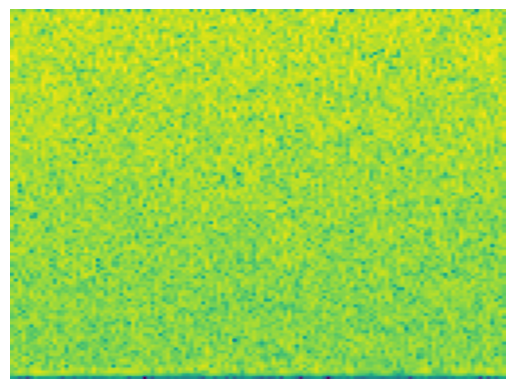

In [6]:
while l < 300:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=l + 6000)

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if (5 < snr_peak < 8) or (8 < snr_peak < 11):
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

10 10
wvfrm = 
l =  300  SNR =  8.059250612097985  m1 =  10  m2 =  10
13 20
wvfrm = 
l =  301  SNR =  11.052279528973267  m1 =  13  m2 =  20
28 19
wvfrm = 
l =  301  SNR =  14.866561597287985  m1 =  28  m2 =  19
21 15
wvfrm = 
l =  301  SNR =  12.50476940972359  m1 =  21  m2 =  15
28 16
wvfrm = 
l =  301  SNR =  13.092861885725936  m1 =  28  m2 =  16
16 17
wvfrm = 
l =  301  SNR =  11.960029726177186  m1 =  16  m2 =  17
12 20
wvfrm = 
l =  301  SNR =  11.436374435795196  m1 =  12  m2 =  20
20 30
wvfrm = 
l =  301  SNR =  16.83070012543844  m1 =  20  m2 =  30
27 21
wvfrm = 
l =  301  SNR =  15.793178603616761  m1 =  27  m2 =  21
13 13
wvfrm = 
l =  301  SNR =  9.7941867286135  m1 =  13  m2 =  13
17 24
wvfrm = 
l =  302  SNR =  15.740814433019263  m1 =  17  m2 =  24
18 18
wvfrm = 
l =  302  SNR =  13.447190342999734  m1 =  18  m2 =  18
27 29
wvfrm = 
l =  302  SNR =  16.60592965162321  m1 =  27  m2 =  29
19 27
wvfrm = 
l =  302  SNR =  15.536368844819286  m1 =  19  m2 =  27
13 30
wvfrm =

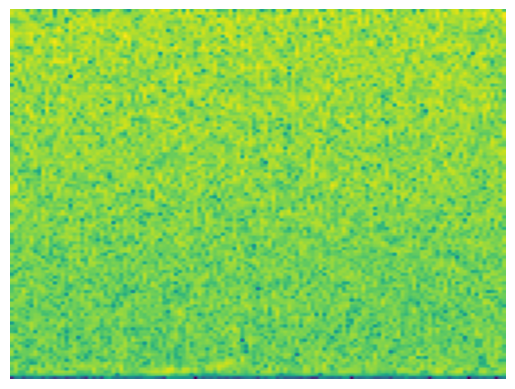

In [7]:
while l < 400:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=l + 6000)

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if (5 < snr_peak < 8) or (8 < snr_peak < 11):
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

24 28
wvfrm = 
l =  400  SNR =  16.813952552021213  m1 =  24  m2 =  28
19 23
wvfrm = 
l =  400  SNR =  16.30106710972998  m1 =  19  m2 =  23
20 29
wvfrm = 
l =  400  SNR =  15.642661457536637  m1 =  20  m2 =  29
23 21
wvfrm = 
l =  400  SNR =  15.888645581627301  m1 =  23  m2 =  21
24 30
wvfrm = 
l =  400  SNR =  19.132212787332296  m1 =  24  m2 =  30
12 13
wvfrm = 
l =  400  SNR =  9.599188323988981  m1 =  12  m2 =  13
23 17
wvfrm = 
l =  401  SNR =  15.741843821326155  m1 =  23  m2 =  17
23 19
wvfrm = 
l =  401  SNR =  15.579869923238606  m1 =  23  m2 =  19
18 27
wvfrm = 
l =  401  SNR =  14.667317289421987  m1 =  18  m2 =  27
26 21
wvfrm = 
l =  401  SNR =  15.512789001491578  m1 =  26  m2 =  21
15 24
wvfrm = 
l =  401  SNR =  12.611686475746433  m1 =  15  m2 =  24
18 17
wvfrm = 
l =  401  SNR =  14.275836154544042  m1 =  18  m2 =  17
22 27
wvfrm = 
l =  401  SNR =  14.19064126572432  m1 =  22  m2 =  27
11 30
wvfrm = 
l =  401  SNR =  11.163120593237549  m1 =  11  m2 =  30
30 15
wvf

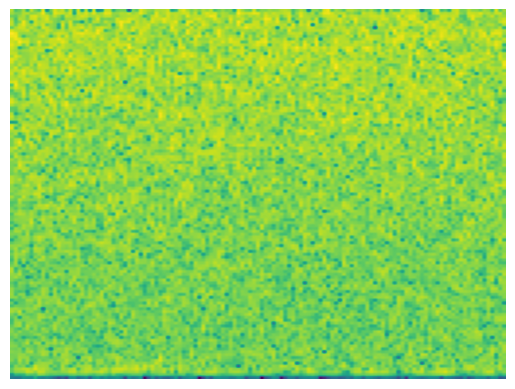

In [8]:
while l < 500:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=l + 6000)

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if (5 < snr_peak < 8) or (8 < snr_peak < 11):
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

In [9]:
while l < 500:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=l + 6000)

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if (5 < snr_peak < 8) or (8 < snr_peak < 11):
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

11 24
wvfrm = 
l =  500  SNR =  11.465564833189168  m1 =  11  m2 =  24
21 22
wvfrm = 
l =  500  SNR =  16.39395401228971  m1 =  21  m2 =  22
11 13
wvfrm = 
l =  500  SNR =  8.832060654517939  m1 =  11  m2 =  13
17 13
wvfrm = 
l =  501  SNR =  11.151245714385308  m1 =  17  m2 =  13
11 19
wvfrm = 
l =  501  SNR =  11.5735003018589  m1 =  11  m2 =  19
19 13
wvfrm = 
l =  501  SNR =  12.603874573377517  m1 =  19  m2 =  13
30 24
wvfrm = 
l =  501  SNR =  18.021673448135356  m1 =  30  m2 =  24
11 24
wvfrm = 
l =  501  SNR =  12.125200094715272  m1 =  11  m2 =  24
15 13
wvfrm = 
l =  501  SNR =  10.236846349296782  m1 =  15  m2 =  13
23 12
wvfrm = 
l =  502  SNR =  12.089435357410258  m1 =  23  m2 =  12
27 17
wvfrm = 
l =  502  SNR =  16.10221900456689  m1 =  27  m2 =  17
17 11
wvfrm = 
l =  502  SNR =  10.736551955851239  m1 =  17  m2 =  11
23 17
wvfrm = 
l =  503  SNR =  14.87675354092023  m1 =  23  m2 =  17
26 13
wvfrm = 
l =  503  SNR =  11.882939305591695  m1 =  26  m2 =  13
17 30
wvfrm 

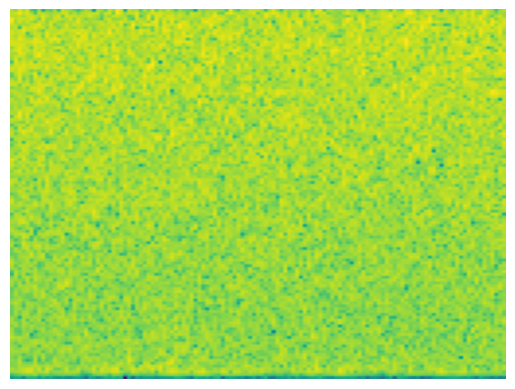

In [10]:
while l < 600:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=l + 6000)

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if (5 < snr_peak < 8) or (8 < snr_peak < 11):
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

15 18
wvfrm = 
l =  600  SNR =  12.060107291623197  m1 =  15  m2 =  18
29 13
wvfrm = 
l =  600  SNR =  13.263058235958123  m1 =  29  m2 =  13
25 20
wvfrm = 
l =  600  SNR =  15.298595195416075  m1 =  25  m2 =  20
21 16
wvfrm = 
l =  600  SNR =  11.395214259348768  m1 =  21  m2 =  16
27 10
wvfrm = 
l =  600  SNR =  10.734385735217817  m1 =  27  m2 =  10
11 13
wvfrm = 
l =  601  SNR =  9.508622668298388  m1 =  11  m2 =  13
14 13
wvfrm = 
l =  602  SNR =  10.966107012519869  m1 =  14  m2 =  13
15 24
wvfrm = 
l =  603  SNR =  12.382599012858142  m1 =  15  m2 =  24
15 11
wvfrm = 
l =  603  SNR =  10.97556117226686  m1 =  15  m2 =  11
20 12
wvfrm = 
l =  604  SNR =  11.592639125924567  m1 =  20  m2 =  12
29 11
wvfrm = 
l =  604  SNR =  11.654392322479678  m1 =  29  m2 =  11
21 21
wvfrm = 
l =  604  SNR =  15.900534379967487  m1 =  21  m2 =  21
13 24
wvfrm = 
l =  604  SNR =  12.912698616867955  m1 =  13  m2 =  24
19 28
wvfrm = 
l =  604  SNR =  16.41489417252709  m1 =  19  m2 =  28
27 30
wvf

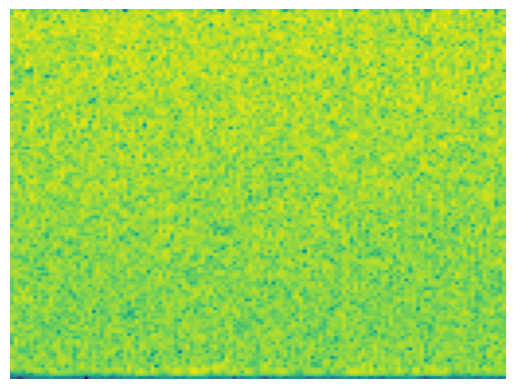

In [11]:
while l < 700:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=l + 6000)

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if (5 < snr_peak < 8) or (8 < snr_peak < 11):
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

15 12
wvfrm = 
l =  700  SNR =  11.008303360831183  m1 =  15  m2 =  12
28 18
wvfrm = 
l =  700  SNR =  15.68397205166535  m1 =  28  m2 =  18
14 29
wvfrm = 
l =  700  SNR =  12.144669647461061  m1 =  14  m2 =  29
23 28
wvfrm = 
l =  700  SNR =  16.20189463509546  m1 =  23  m2 =  28
20 17
wvfrm = 
l =  700  SNR =  14.788446363473334  m1 =  20  m2 =  17
10 13
wvfrm = 
l =  700  SNR =  8.41858153088161  m1 =  10  m2 =  13
27 24
wvfrm = 
l =  701  SNR =  17.653381214106552  m1 =  27  m2 =  24
16 20
wvfrm = 
l =  701  SNR =  14.782547331134852  m1 =  16  m2 =  20
10 14
wvfrm = 
l =  701  SNR =  8.56078478398175  m1 =  10  m2 =  14
27 30
wvfrm = 
l =  702  SNR =  18.633171123727813  m1 =  27  m2 =  30
13 12
wvfrm = 
l =  702  SNR =  8.426812621494479  m1 =  13  m2 =  12
21 20
wvfrm = 
l =  703  SNR =  16.04402846175126  m1 =  21  m2 =  20
18 21
wvfrm = 
l =  703  SNR =  15.321956254521591  m1 =  18  m2 =  21
24 20
wvfrm = 
l =  703  SNR =  15.761501616522544  m1 =  24  m2 =  20
15 24
wvfrm = 

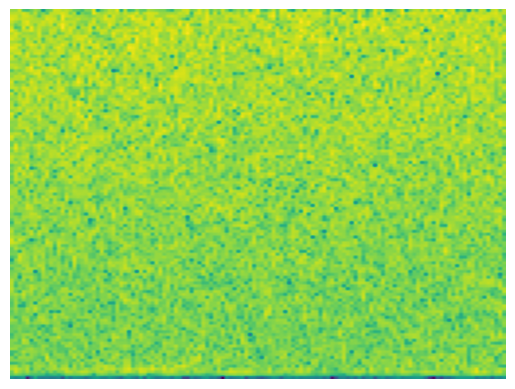

In [12]:
while l < 800:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=l + 6000)

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if (5 < snr_peak < 8) or (8 < snr_peak < 11):
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

21 24
wvfrm = 
l =  800  SNR =  14.88805321854798  m1 =  21  m2 =  24
29 25
wvfrm = 
l =  800  SNR =  17.416289005361296  m1 =  29  m2 =  25
16 29
wvfrm = 
l =  800  SNR =  13.427007095484406  m1 =  16  m2 =  29
20 17
wvfrm = 
l =  800  SNR =  14.487598979310576  m1 =  20  m2 =  17
29 20
wvfrm = 
l =  800  SNR =  17.35079277895443  m1 =  29  m2 =  20
18 14
wvfrm = 
l =  800  SNR =  11.498917551108606  m1 =  18  m2 =  14
19 27
wvfrm = 
l =  800  SNR =  14.815553864023558  m1 =  19  m2 =  27
13 19
wvfrm = 
l =  800  SNR =  10.758677243513578  m1 =  13  m2 =  19
17 13
wvfrm = 
l =  801  SNR =  11.462245406587627  m1 =  17  m2 =  13
15 27
wvfrm = 
l =  801  SNR =  14.942815138460857  m1 =  15  m2 =  27
21 19
wvfrm = 
l =  801  SNR =  14.32308442117094  m1 =  21  m2 =  19
24 10
wvfrm = 
l =  801  SNR =  10.220329686854871  m1 =  24  m2 =  10
15 17
wvfrm = 
l =  802  SNR =  12.423414500271226  m1 =  15  m2 =  17
23 20
wvfrm = 
l =  802  SNR =  14.585437008816227  m1 =  23  m2 =  20
20 28
wvf

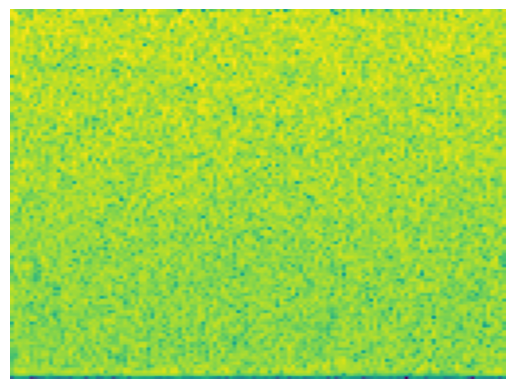

In [13]:
while l < 900:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=l + 6000)

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if (5 < snr_peak < 8) or (8 < snr_peak < 11):
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

30 22
wvfrm = 
l =  900  SNR =  17.760847906909696  m1 =  30  m2 =  22
15 25
wvfrm = 
l =  900  SNR =  11.696016724791763  m1 =  15  m2 =  25
20 22
wvfrm = 
l =  900  SNR =  15.95623010009831  m1 =  20  m2 =  22
14 28
wvfrm = 
l =  900  SNR =  12.834461613407388  m1 =  14  m2 =  28
15 30
wvfrm = 
l =  900  SNR =  15.239888978532338  m1 =  15  m2 =  30
21 25
wvfrm = 
l =  900  SNR =  15.974822443127415  m1 =  21  m2 =  25
30 22
wvfrm = 
l =  900  SNR =  17.090962955725466  m1 =  30  m2 =  22
27 15
wvfrm = 
l =  900  SNR =  16.800406442532797  m1 =  27  m2 =  15
28 12
wvfrm = 
l =  900  SNR =  10.521162025515894  m1 =  28  m2 =  12
20 26
wvfrm = 
l =  901  SNR =  16.178409508925377  m1 =  20  m2 =  26
23 24
wvfrm = 
l =  901  SNR =  15.116114312749213  m1 =  23  m2 =  24
22 20
wvfrm = 
l =  901  SNR =  16.535299512196055  m1 =  22  m2 =  20
10 13
wvfrm = 
l =  901  SNR =  8.114294551010623  m1 =  10  m2 =  13
19 24
wvfrm = 
l =  902  SNR =  14.64569503535229  m1 =  19  m2 =  24
25 22
wvf

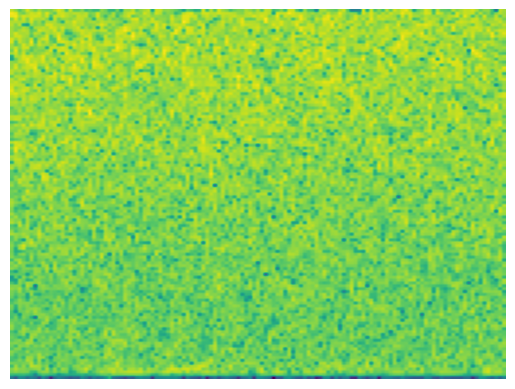

In [14]:
while l < 1000:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=l + 6000)

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if (5 < snr_peak < 8) or (8 < snr_peak < 11):
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

12 24
wvfrm = 
l =  1000  SNR =  11.931263734009555  m1 =  12  m2 =  24
25 15
wvfrm = 
l =  1000  SNR =  13.626277582242558  m1 =  25  m2 =  15
15 29
wvfrm = 
l =  1000  SNR =  13.826904931687809  m1 =  15  m2 =  29
23 17
wvfrm = 
l =  1000  SNR =  12.939942818341066  m1 =  23  m2 =  17
29 28
wvfrm = 
l =  1000  SNR =  18.633278400125185  m1 =  29  m2 =  28
27 20
wvfrm = 
l =  1000  SNR =  14.33299247786619  m1 =  27  m2 =  20
12 14
wvfrm = 
l =  1000  SNR =  10.95516785917591  m1 =  12  m2 =  14
30 30
wvfrm = 
l =  1001  SNR =  17.80625073089989  m1 =  30  m2 =  30
24 17
wvfrm = 
l =  1001  SNR =  14.812569648890111  m1 =  24  m2 =  17
14 17
wvfrm = 
l =  1001  SNR =  11.20139644539141  m1 =  14  m2 =  17
26 25
wvfrm = 
l =  1001  SNR =  19.099118974875203  m1 =  26  m2 =  25
14 11
wvfrm = 
l =  1001  SNR =  10.500942407575021  m1 =  14  m2 =  11
18 10
wvfrm = 
l =  1002  SNR =  11.357530726706017  m1 =  18  m2 =  10
30 27
wvfrm = 
l =  1002  SNR =  19.66626761579925  m1 =  30  m2 =  

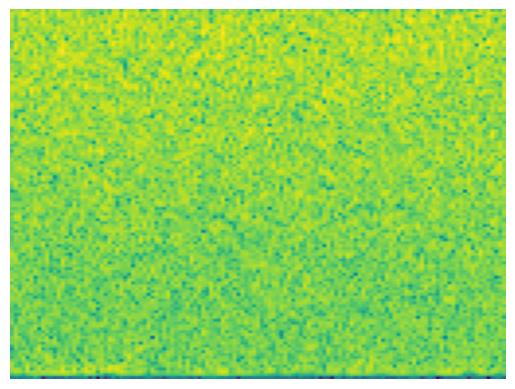

In [15]:
while l < 1100:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=l + 6000)

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if (5 < snr_peak < 8) or (8 < snr_peak < 11):
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

16 17
wvfrm = 
l =  1100  SNR =  11.573177632396561  m1 =  16  m2 =  17
13 10
wvfrm = 
l =  1100  SNR =  10.301565889215755  m1 =  13  m2 =  10
22 25
wvfrm = 
l =  1101  SNR =  16.53769637825655  m1 =  22  m2 =  25
12 16
wvfrm = 
l =  1101  SNR =  10.937846386078975  m1 =  12  m2 =  16
14 23
wvfrm = 
l =  1102  SNR =  12.372981263847397  m1 =  14  m2 =  23
24 27
wvfrm = 
l =  1102  SNR =  15.726959088935786  m1 =  24  m2 =  27
21 16
wvfrm = 
l =  1102  SNR =  15.430014412790895  m1 =  21  m2 =  16
15 23
wvfrm = 
l =  1102  SNR =  12.707524659443399  m1 =  15  m2 =  23
12 27
wvfrm = 
l =  1102  SNR =  13.590973680482763  m1 =  12  m2 =  27
14 11
wvfrm = 
l =  1102  SNR =  9.983407918471512  m1 =  14  m2 =  11
10 11
wvfrm = 
l =  1103  SNR =  10.960302484892756  m1 =  10  m2 =  11
13 20
wvfrm = 
l =  1104  SNR =  12.300812621830678  m1 =  13  m2 =  20
22 26
wvfrm = 
l =  1104  SNR =  17.041703733495957  m1 =  22  m2 =  26
21 23
wvfrm = 
l =  1104  SNR =  13.939027486664033  m1 =  21  m2 

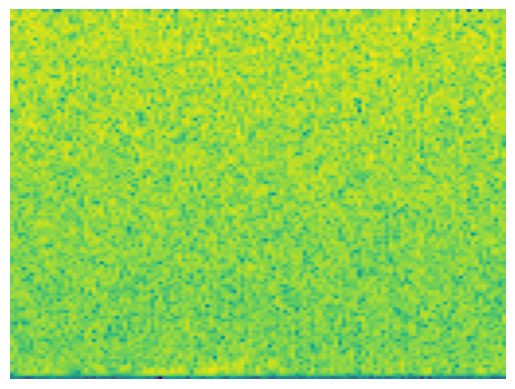

In [16]:
while l < 1200:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=l + 6000)

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if (5 < snr_peak < 8) or (8 < snr_peak < 11):
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

19 30
wvfrm = 
l =  1200  SNR =  15.385686587567221  m1 =  19  m2 =  30
11 25
wvfrm = 
l =  1200  SNR =  12.24725862932066  m1 =  11  m2 =  25
10 20
wvfrm = 
l =  1200  SNR =  10.613353243814345  m1 =  10  m2 =  20
14 22
wvfrm = 
l =  1201  SNR =  13.28776295424224  m1 =  14  m2 =  22
17 18
wvfrm = 
l =  1201  SNR =  13.251394558159955  m1 =  17  m2 =  18
23 17
wvfrm = 
l =  1201  SNR =  11.81121289640357  m1 =  23  m2 =  17
22 15
wvfrm = 
l =  1201  SNR =  13.602978015580206  m1 =  22  m2 =  15
18 11
wvfrm = 
l =  1201  SNR =  10.808200902882152  m1 =  18  m2 =  11
24 18
wvfrm = 
l =  1202  SNR =  15.010059963032928  m1 =  24  m2 =  18
29 28
wvfrm = 
l =  1202  SNR =  20.040185670405258  m1 =  29  m2 =  28
18 27
wvfrm = 
l =  1202  SNR =  16.124588175645677  m1 =  18  m2 =  27
21 28
wvfrm = 
l =  1202  SNR =  17.637924387331946  m1 =  21  m2 =  28
21 17
wvfrm = 
l =  1202  SNR =  13.664680511150577  m1 =  21  m2 =  17
12 28
wvfrm = 
l =  1202  SNR =  12.072900024381573  m1 =  12  m2 =

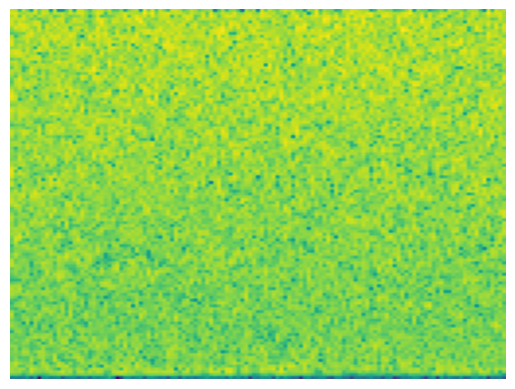

In [17]:
while l < 1300:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=l + 6000)

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if (5 < snr_peak < 8) or (8 < snr_peak < 11):
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

20 10
wvfrm = 
l =  1300  SNR =  10.478187011576175  m1 =  20  m2 =  10
16 30
wvfrm = 
l =  1301  SNR =  15.661955741984565  m1 =  16  m2 =  30
12 25
wvfrm = 
l =  1301  SNR =  12.943526145689887  m1 =  12  m2 =  25
11 21
wvfrm = 
l =  1301  SNR =  11.418196233331772  m1 =  11  m2 =  21
28 22
wvfrm = 
l =  1301  SNR =  16.63873660205996  m1 =  28  m2 =  22
11 14
wvfrm = 
l =  1301  SNR =  11.713950433264758  m1 =  11  m2 =  14
12 29
wvfrm = 
l =  1301  SNR =  13.256034068030305  m1 =  12  m2 =  29
26 10
wvfrm = 
l =  1301  SNR =  8.992264609015908  m1 =  26  m2 =  10
12 25
wvfrm = 
l =  1302  SNR =  10.564622660272192  m1 =  12  m2 =  25
28 15
wvfrm = 
l =  1303  SNR =  14.267369316410417  m1 =  28  m2 =  15
19 14
wvfrm = 
l =  1303  SNR =  12.016115964135006  m1 =  19  m2 =  14
13 20
wvfrm = 
l =  1303  SNR =  12.797298474388853  m1 =  13  m2 =  20
27 15
wvfrm = 
l =  1303  SNR =  13.92517875762307  m1 =  27  m2 =  15
30 11
wvfrm = 
l =  1303  SNR =  9.89171195370482  m1 =  30  m2 =  

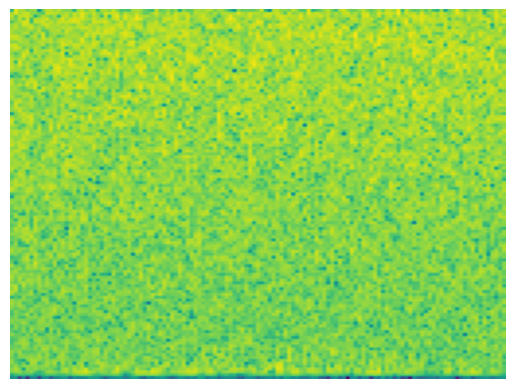

In [18]:
while l < 1400:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=l + 6000)

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if (5 < snr_peak < 8) or (8 < snr_peak < 11):
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

15 24
wvfrm = 
l =  1400  SNR =  12.887811042093007  m1 =  15  m2 =  24
14 10
wvfrm = 
l =  1400  SNR =  9.32605453086031  m1 =  14  m2 =  10
28 21
wvfrm = 
l =  1401  SNR =  15.885154324395026  m1 =  28  m2 =  21
17 29
wvfrm = 
l =  1401  SNR =  14.768243935700765  m1 =  17  m2 =  29
18 22
wvfrm = 
l =  1401  SNR =  15.06918686135339  m1 =  18  m2 =  22
19 15
wvfrm = 
l =  1401  SNR =  12.942952034663714  m1 =  19  m2 =  15
19 27
wvfrm = 
l =  1401  SNR =  16.132131537560788  m1 =  19  m2 =  27
18 26
wvfrm = 
l =  1401  SNR =  14.595487717146733  m1 =  18  m2 =  26
11 15
wvfrm = 
l =  1401  SNR =  11.028416420907643  m1 =  11  m2 =  15
11 12
wvfrm = 
l =  1401  SNR =  9.010892919833015  m1 =  11  m2 =  12
21 30
wvfrm = 
l =  1402  SNR =  18.731731251827018  m1 =  21  m2 =  30
29 13
wvfrm = 
l =  1402  SNR =  15.014451995368454  m1 =  29  m2 =  13
11 22
wvfrm = 
l =  1402  SNR =  11.7465551584729  m1 =  11  m2 =  22
29 16
wvfrm = 
l =  1402  SNR =  15.287482220515038  m1 =  29  m2 =  1

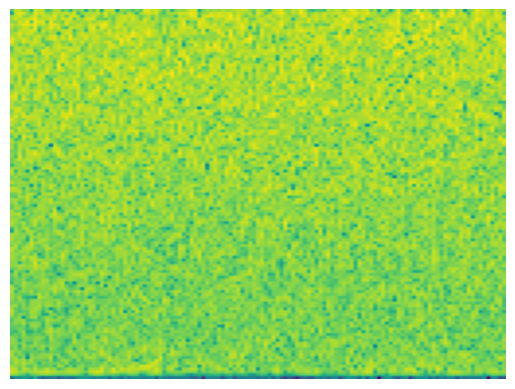

In [19]:
while l < 1500:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=l + 6000)

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if (5 < snr_peak < 8) or (8 < snr_peak < 11):
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

wavform generate random mass
scale wvfrm
add to noise
calc snr
make spectrograms
classify into folders
